In [1]:
# Homework 6 Solution
# G. Besla & R. Li & H. Foote

In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass


# for bonus:
# scipy provides powerful functions for scientific computing
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [2]:
def orbitCOM(galaxy, start, end, n):
    """Function that loops over all the desired snapshots to compute the COM pos
    and vel as a function of time
    
    INPUTS:
    -------
           galaxy: `str; 'MW', 'M31', or 'M33'`
               Name of the galaxy to read in
           start : `int`
               Number of the first snapshot to read,  e.g. 0
           end: `int`
               Number of the last snapshot to read,   e.g. 100
           n: `int`
               Interval between snapshots to read.  n should not be 0
               
    RETURNS:
    --------
            Results are stored in a .txt file with 
            COM pos/vel of a galaxy at snapshots over the range (start, end+n, n) 
             columns t, x, y, z, vx, vy, vz for n snapshots
    """
    
    # compose the filename for output
    fileout = 'Orbit_%s.txt'%(galaxy)   # filename to store output
    #The above is equivalent to :
    # fileout = "Orbit_" + galaxy + ".txt"

    
    #  set tolerance and volDec for calculating COM_P in CenterOfMass
    # delta will be 100 pc regardless of the galaxy, but volDec is different
    delta, volDec = 0.1, 2.0
    # for M33, which undergoes more mass loss, use a different value for volDec
    if galaxy == "M33": 
        volDec = 4.0
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start, end+n, n)
    
    #  ***** GOOD PRACTICE: *****
    # check if the input is eligible (not required)
    if snap_ids.size == 0:
        raise ValueError("Cannot build a sequence using the input, start = ", 
                         start, "end = ", end, "n = ", n)
    # equivalently you could use "assert"
    # assert len(snap_ids) > 0, "Snapshot ID array is empty"
    
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size, 7])
    # you could equivalently: 
    # orbit = np.zeros([len(snap_ids), 7])
    
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        filename = "VLowRes/" + galaxy + "/" + galaxy +  "_{:03d}".format(snap_id) + ".txt"
        
        # The above is equivalent to :
        #ilbl = '000' + str(snap_id) # pad snapshot number
        #ilbl = ilbl[-3:] # cut off leading digits so we end up with a three-digit snap number
        #filename = 'VLowRes/%s_'%(galaxy) + ilbl + '.txt' # filename of the snapshot
        
        
        # Initialize an instance of CenterOfMass class, using disk particles
        com = CenterOfMass(filename, 2)
        # Store the COM pos and vel. Remember that now com_P required volDec
        com_pos = com.COM_P(delta, volDec)
        com_vel = com.COM_V(com_pos[0],com_pos[1], com_pos[2])
        
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = com.time.value/1000, *tuple(com_pos.value), *tuple(com_vel.value)
        # by dividing by 1000, time in the above is now in Gyr
        
        # print snap_id to see the progress
        print('Saving snapshot {} of {}'.format(snap_id, end))
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    
    

In [3]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
print("Starting to Compute MW Orbit")
orbitCOM("MW",0,800,5)
print("Starting to Compute M31 Orbit")
orbitCOM("M31",0,800,5)
print("Starting to Compute M33 Orbit")
orbitCOM("M33",0,800,5)

Starting to Compute MW Orbit
Saving snapshot 0 of 800
Saving snapshot 5 of 800
Saving snapshot 10 of 800
Saving snapshot 15 of 800
Saving snapshot 20 of 800
Saving snapshot 25 of 800
Saving snapshot 30 of 800
Saving snapshot 35 of 800
Saving snapshot 40 of 800
Saving snapshot 45 of 800
Saving snapshot 50 of 800
Saving snapshot 55 of 800
Saving snapshot 60 of 800
Saving snapshot 65 of 800
Saving snapshot 70 of 800
Saving snapshot 75 of 800
Saving snapshot 80 of 800
Saving snapshot 85 of 800
Saving snapshot 90 of 800
Saving snapshot 95 of 800
Saving snapshot 100 of 800
Saving snapshot 105 of 800
Saving snapshot 110 of 800
Saving snapshot 115 of 800
Saving snapshot 120 of 800
Saving snapshot 125 of 800
Saving snapshot 130 of 800
Saving snapshot 135 of 800
Saving snapshot 140 of 800
Saving snapshot 145 of 800
Saving snapshot 150 of 800
Saving snapshot 155 of 800
Saving snapshot 160 of 800
Saving snapshot 165 of 800
Saving snapshot 170 of 800
Saving snapshot 175 of 800
Saving snapshot 180 o

Saving snapshot 710 of 800
Saving snapshot 715 of 800
Saving snapshot 720 of 800
Saving snapshot 725 of 800
Saving snapshot 730 of 800
Saving snapshot 735 of 800
Saving snapshot 740 of 800
Saving snapshot 745 of 800
Saving snapshot 750 of 800
Saving snapshot 755 of 800
Saving snapshot 760 of 800
Saving snapshot 765 of 800
Saving snapshot 770 of 800
Saving snapshot 775 of 800
Saving snapshot 780 of 800
Saving snapshot 785 of 800
Saving snapshot 790 of 800
Saving snapshot 795 of 800
Saving snapshot 800 of 800
Starting to Compute M33 Orbit
Saving snapshot 0 of 800
Saving snapshot 5 of 800
Saving snapshot 10 of 800
Saving snapshot 15 of 800
Saving snapshot 20 of 800
Saving snapshot 25 of 800
Saving snapshot 30 of 800
Saving snapshot 35 of 800
Saving snapshot 40 of 800
Saving snapshot 45 of 800
Saving snapshot 50 of 800
Saving snapshot 55 of 800
Saving snapshot 60 of 800
Saving snapshot 65 of 800
Saving snapshot 70 of 800
Saving snapshot 75 of 800
Saving snapshot 80 of 800
Saving snapshot 8

In [22]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_orbit = np.genfromtxt('Orbit_MW.txt',dtype=None,names=True) 
M31_orbit = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True) 
M33_orbit = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True) 


In [23]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relative_mag(a, b): 
    """
    Function that computes the magnitude of the difference between two vectors.
    Inputs with shape (3, n) will return n outputs

    PARAMETERS
    ----------
    a : `np.ndarray'
        first vector
    b : 'np.ndarray'
        second vector

    RETURNS
    -------
    mag : `float or np.ndarray`
        |a-b|
    """
    
    # compute the difference vector
    x = a[0] - b[0] 
    y = a[1] - b[1]
    z = a[2] - b[2]

    # return its magnitude
    return np.sqrt(x**2 + y**2 + z**2)

In [24]:

# position vectors of each galaxy with respect to 0,0,0
MW_pos = np.array([MW_orbit['x'], MW_orbit['y'], MW_orbit['z']])
M31_pos = np.array([M31_orbit['x'], M31_orbit['y'], M31_orbit['z']])
M33_pos = np.array([M33_orbit['x'], M33_orbit['y'], M33_orbit['z']])

# velocity vectors of each galaxy with respect to 0,0,0
MW_vel = np.array([MW_orbit['vx'], MW_orbit['vy'], MW_orbit['vz']])
M31_vel = np.array([M31_orbit['vx'], M31_orbit['vy'], M31_orbit['vz']])
M33_vel = np.array([M33_orbit['vx'], M33_orbit['vy'], M33_orbit['vz']])


In [25]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
MW_M31_relpos = relative_mag(M31_pos, MW_pos)
MW_M31_relvel = relative_mag(M31_vel, MW_vel)

# of M33 and M31
M33_M31_relpos = relative_mag(M31_pos, M33_pos)
M33_M31_relvel = relative_mag(M31_vel, M33_vel)


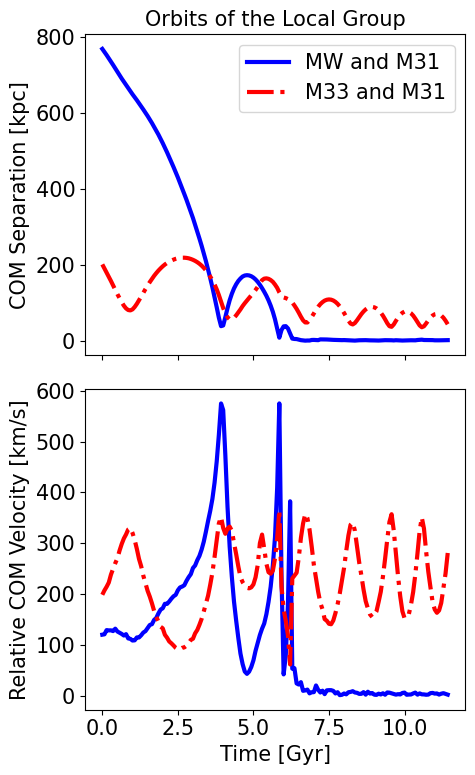

In [26]:
# set up plots
fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

# set fontsize 
plt.rcParams['font.size'] = 15

# Plot the Orbit of the galaxies 
#################################
ax = axes[0]
# Plot the separtion of M31 and MW
ax.plot(M31_orbit['t'], MW_M31_relpos, c='b', lw=3, label='MW and M31')
# Plot the separtion of M33 and M31
ax.plot(M31_orbit['t'], M33_M31_relpos, c='r', lw=3, ls="-.", label='M33 and M31')
ax.set(ylabel='COM Separation [kpc]')
ax.legend()

# Set the title
ax.set_title("Orbits of the Local Group", fontsize=15)

# Plot the orbital velocities of the galaxies 
#################################
ax = axes[1]
ax.plot(M31_orbit['t'], MW_M31_relvel, c='b',  lw=3, label='MW and M31')
ax.plot(M31_orbit['t'], M33_M31_relvel, c='r', lw=3, ls="-.", label='M33 and M31')
ax.set(ylabel='Relative COM Velocity [km/s]', xlabel='Time [Gyr]')

#adjust tick label font size
#label_size = 15
#matplotlib.rcParams['xtick.labelsize'] = label_size 
#matplotlib.rcParams['ytick.labelsize'] = label_size


plt.tight_layout()
plt.savefig('Homework6_orbits.png', bbox_inches='tight')



# Answering Questions

Q1: 2 encounters and then they merge on the 3rd encounter

Q2:  The velocity peaks when the separation is smallest and is at a minimum when the separation is largest.  Energy is being exchanged - from potential energy to kinetic at pericenter. The opposite occurs at apocenter.

Q3:  a) MW-M31 Merger will occur in ~ 6.5 Gyr (see plot below)
Note that the force resolution (gravitational softening) of the N-body is of order 3 kpc.
Separations a few times that scale are not going to be well resolved. 

Q3: b)  M33's orbit is slowly decaying over time, but the orbit does change a bit at the time of the merger
and starts to decay more quickly. This is because there is more material in the central regions of the 
combined MW+M31 object than about M31 alone. 

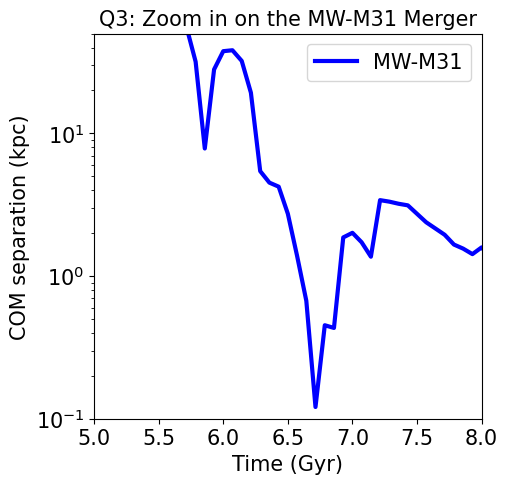

In [27]:
# Plot a zoom of the MW-M31 Orbit, using log y axis 
# To answer Q3 
#################################

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)

# Plot the separtion of M31 and MW
plt.semilogy(MW_orbit['t'], MW_M31_relpos, color='blue', lw=3, label='MW-M31')

# Add axis labels
plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('COM separation (kpc)', fontsize=15)

# Set title
plt.title("Q3: Zoom in on the MW-M31 Merger", fontsize=15)

#set axis limits
plt.ylim(0.1,50)
plt.xlim(5,8)

#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right')

fig.savefig('Homework6_Q3.png')



# BONUS

In [12]:
# BONUS: 

# get orbits after 6 Gyr only 
decay_time = MW_orbit['t'][MW_orbit['t']>6]
decay_orbit = M33_M31_relpos[MW_orbit['t']>6]

# find the local maxima in M33-M31 orbit within the past 6 Gyr
indices, _ = find_peaks(decay_orbit)

# get the apocenter distances and times for those maxima
apo_time = decay_time[indices]
print("Times of Apocenters (Gyr)", np.round(apo_time, 1))
apo_sep = decay_orbit[indices]
print("Distances of Apocenters (kpc)", np.round(apo_sep, 1)) 

# print the decay rate as defined in the HW instructions
# Decay rate = difference between apocenter distances divided by the time between apocenters
print("")
print("Decay rate over three orbits:", 
      (apo_sep[1:] - apo_sep[:-1]) / (apo_time[1:] - apo_time[:-1]), 
      'kpc / Gyr')

# now fit an exponential decay function
exp_decay = lambda t, a, b, c : a * np.exp(-b * t) + c
# using curve_fit
popt, pcov = curve_fit(exp_decay, apo_time, apo_sep)


Times of Apocenters (Gyr) [ 7.5  8.9 10.1 11.1]
Distances of Apocenters (kpc) [108.8  89.1  77.4  70.7]

Decay rate over three orbits: [-13.76533995 -10.21700402  -6.71923336] kpc / Gyr


/var/folders/m0/37m77_993y7_0b919q6flk2h0000gn/T/ipykernel_72464/4156586505.py:24: RuntimeWarning: overflow encountered in exp
  exp_decay = lambda t, a, b, c : a * np.exp(-b * t) + c


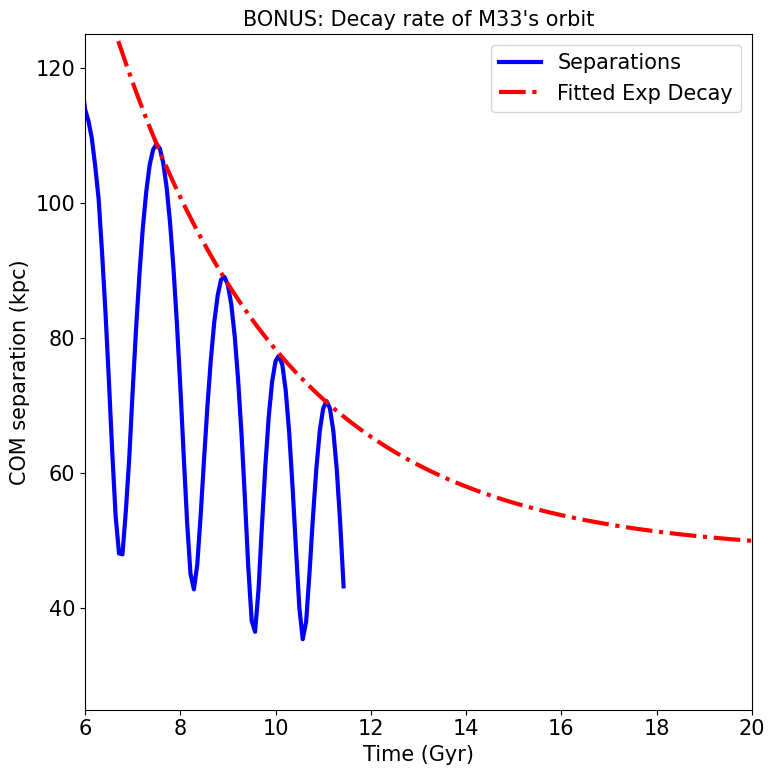

In [13]:
# Fit the orbital decay of M33-M31
#################################

fig, ax= plt.subplots(figsize=(8, 8));

# Plot the velocities of M33 and M31
ax.plot(MW_orbit['t'], M33_M31_relpos, 'b', lw=3, label='Separations')

# Plot the fitted curve for the decay rate
ax.plot(np.linspace(6, 20, 100), exp_decay(np.linspace(6, 20, 100), *popt), 
        'r', lw=3,ls='-.', label='Fitted Exp Decay')

# Add axis labels
ax.set_xlabel('Time (Gyr)', fontsize=15)
ax.set_ylabel('COM separation (kpc)', fontsize=15)
ax.set_title("BONUS: Decay rate of M33's orbit", fontsize=15)
ax.set_xlim([6, 20]); ax.set_ylim([25, 125])

#adjust tick label font size
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# add a legend with some customizations.
ax.legend(loc='best', fontsize=15)

# tight layout
fig.tight_layout()

# Save to a file
fig.savefig('Homework6_Bonus.png')

Q4 Bonus: 

The orbital period decays from ~110 to 90 over 1.5 Gyr then from 90 to 75 over 1.2 Gyr 
if this rate of decay were to continue, you would expect it to take 75 /[(110-90)/1.5] ~ 5.6 Gyr for the orbit of M33 to decay from 75 kpc. 

BUT the rate of decay is slowing down by the end of the simulation - rate of (75-70)kpc/1 Gyr ~ 4 kpc/Gyr. At that rate it would take more than 20 Gyr to merge!   Galaxies merge because their orbits decay owing to dynamical friction. This friction term scales with the mass of the galaxy. As M33's mass is removed by tidal effects, the strength of dynamical friction weakens and the decay rate of the orbit slows.  It will take a very long time for the M33 remnant to merge! This is much longer than for the much more massive MW and M31 to merge! 

This fits well with the expectations if you fit an exponential decay rate. 

NOTE: If you don't decrease RMAX by 4 for M33 the Orbit will look pretty ratty because there is a lot of tidal debris
Another, more clever way, would be to use a smaller volume centered on the COM from the previous snapshot as the starting point. 